<h1 style="text-align: center;"> Final Project </h1>
<p style="text-align: center;"> <strong> Yichen Gong, Yihan Xu, Frank Zhao</strong></p>

## I. Dataset
### (a). Dataset Introduction
We are using the [Home Mortgage Disclosure Act (HMDA)](https://www.consumerfinance.gov/data-research/hmda/) dataset of the Consumer Financial Protection Bureau (CFPB) to study upon which conditions a mortgage request is approved or rejected. Our research focuses on the dataset between 2018 and 2019, which can be downloaded from [FFEIC](https://ffiec.cfpb.gov/data-publication/).

### (b). Dataset Summary Statistics and Preprocessing
#### (1). load data from disk

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_rows = 70
df = pd.read_csv("lar_10.csv", delimiter = ",", dtype = {"activity_year": "object", "action_taken":"object", "preapproval":"object", "loan_type":"object", "loan_purpose":"object","hoepa_status  ":"object","activity_year":"object"} )

#### (2). Summary data statistics and pick features/observations of interest

In [2]:
df.describe()

,Unnamed: 0,derived_msa_md,purchaser_type,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,hoepa_status,negative_amortization,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percen,ffiec_msa_md_median_family_incom,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_unit
count,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,...,67868.000000,12077.000000,1211.000000,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06,1.689568e+06
mean,8.447835e+05,3.683390e+04,5.257184e+00,1.143089e+00,3.173110e+01,3.119922e+01,3.147323e+01,2.413841e+05,2.431189e+00,3.206510e+01,...,4.116137,4.721620,4.596201,5.549739e+03,3.129275e+01,7.365712e+04,1.107751e+02,1.427816e+03,1.949313e+03,3.488797e+01
std,4.877364e+05,2.426175e+04,1.644296e+01,3.511507e-01,1.791502e+02,1.780380e+02,1.784724e+02,9.011438e+05,4.976853e-01,1.801097e+02,...,2.668994,2.773378,3.491376,3.233306e+03,2.616027e+01,1.945617e+04,4.482474e+01,9.023557e+02,1.129251e+03,1.841395e+01
min,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,5.000000e+03,-1.000000e+00,-1.000000e+00,...,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,4.223918e+05,1.974000e+04,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.500000e+04,2.000000e+00,2.000000e+00,...,2.000000,3.000000,1.000000,3.729000e+03,1.051000e+01,6.420000e+04,8.500000e+01,8.930000e+02,1.297000e+03,2.100000e+01
50%,8.447835e+05,3.387400e+04,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.750000e+05,2.000000e+00,2.000000e+00,...,3.000000,4.000000,5.000000,5.078000e+03,2.315000e+01,7.380000e+04,1.070000e+02,1.303000e+03,1.790000e+03,3.300000e+01
75%,1.267175e+06,4.174000e+04,2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.850000e+05,3.000000e+00,2.000000e+00,...,6.000000,7.000000,7.000000,6.707000e+03,4.600000e+01,8.180000e+04,1.330000e+02,1.795000e+03,2.397000e+03,4.700000e+01
max,1.689567e+06,9.999900e+04,7.200000e+01,2.000000e+00,1.111000e+03,1.111000e+03,1.111000e+03,3.100050e+08,3.000000e+00,1.111000e+03,...,9.000000,9.000000,9.000000,5.381200e+04,1.000000e+02,1.510000e+05,5.070000e+02,1.952900e+04,2.539100e+04,7.600000e+01


In [4]:
df_Selected = df[["activity_year","derived_ethnicity", "derived_race", "derived_sex", "action_taken",
                            "preapproval","loan_type", "loan_purpose", "lien_status", "reverse_mortgage",
                            "open_end_line_of_credit", "business_or_commercial_purpose", "combined_loan_to_value_ratio",
                            "property_value", "construction_method", "occupancy_type", "total_units",
                            "income", "debt_to_income_ratio", "applicant_age", "submission_of_application"
                            ]]
df_Selected = df_Selected[df_Selected["action_taken"].isin(("1", "3"))]
df_Selected = df_Selected[df_Selected["derived_ethnicity"] != "Free Form Text Only"]
df_Selected = df_Selected[df_Selected["derived_race"] != "Free Form Text Only"]
df_Selected = df_Selected[df_Selected["derived_sex"] != "Sex Not Available"]
df_Selected = df_Selected[df_Selected["derived_ethnicity"] != "Ethnicity Not Available"]

# 5 means Loan Purpose not applicable
df_Selected = df_Selected[df_Selected["loan_purpose"] != "5"]
# 1111 means the feature is not applicable
df_Selected = df_Selected[df_Selected["reverse_mortgage"] != 1111]
df_Selected = df_Selected[df_Selected["open_end_line_of_credit"] != 1111]
df_Selected = df_Selected[df_Selected["business_or_commercial_purpose"] != 1111]
df_Selected = df_Selected[df_Selected["submission_of_application"] != 1111]
df_Selected = df_Selected[df_Selected["property_value"] != "Exempt"]
df_Selected = df_Selected[df_Selected["construction_method"] != "Free Form Text Only"]
df_Selected = df_Selected[df_Selected["income"] != "Free Form Text Only"]
df_Selected = df_Selected[df_Selected["income"] != "Exempt"]
df_Selected = df_Selected[df_Selected["debt_to_income_ratio"] != "Exempt"]
# 8888, 9999 means age is not applicable
df_Selected = df_Selected[df_Selected["applicant_age"] != '8888']
df_Selected = df_Selected[df_Selected["applicant_age"] != '9999']
df_Selected =df_Selected[df_Selected["combined_loan_to_value_ratio"] != "Exempt"]
df_Selected["lien_status"] = df_Selected["lien_status"].astype(object)
df_Selected["reverse_mortgage"] = df_Selected["reverse_mortgage"].astype(object)
df_Selected["open_end_line_of_credit"] = df_Selected["open_end_line_of_credit"].astype(object)
df_Selected["business_or_commercial_purpose"] = df_Selected["business_or_commercial_purpose"].astype(object)
df_Selected["submission_of_application"] = df_Selected["submission_of_application"].astype(object)
df_Selected["occupancy_type"] = df_Selected["occupancy_type"].astype(object)
df_Selected["construction_method"] = df_Selected["construction_method"].astype(object)
df_Selected["combined_loan_to_value_ratio"] = df_Selected["combined_loan_to_value_ratio"].astype(float)
df_Selected["property_value"] = df_Selected["property_value"].astype(float)
df_Selected = pd.get_dummies(df_Selected)
df_2019_Selected = df_Selected[df_Selected["activity_year_2019"] == 1]
df_2018_Selected = df_Selected[df_Selected["activity_year_2018"] == 1]
df_2019_Selected = df_2019_Selected.drop(columns = ["activity_year_2019", "activity_year_2018"])
df_2018_Selected = df_2018_Selected.drop(columns = ["activity_year_2019", "activity_year_2018"])

In [6]:
df_2019_Selected

,combined_loan_to_value_ratio,property_value,income,derived_ethnicity_Hispanic or Latino,derived_ethnicity_Joint,derived_ethnicity_Not Hispanic or Latino,derived_race_2 or more minority races,derived_race_American Indian or Alaska Native,derived_race_Asian,derived_race_Black or African American,...,debt_to_income_ratio_>60%,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_<25,applicant_age_>74,submission_of_application_1,submission_of_application_2
1513977,44.666,365000.0,94.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1513980,97.177,145000.0,40.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1513981,103.860,375000.0,190.0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1513986,71.429,245000.0,173.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1513990,98.886,145000.0,50.0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689560,94.258,205000.0,179.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1689561,75.510,435000.0,90.0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1689563,89.580,265000.0,95.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1689566,90.404,395000.0,0.0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [7]:
# fill numeric values with mean and drop null values of dummies
df_2019_Selected = df_2019_Selected.dropna()
df_2019_Selected = pd.get_dummies(df_2019_Selected)

In [8]:
df_2018_Selected = df_2018_Selected.fillna(df_2018_Selected.mean(numeric_only=True))
df_2018_Selected = df_2018_Selected.dropna()
df_2018_Selected = pd.get_dummies(df_2018_Selected)

In [9]:
# Our dataset should not have null values now.
print(df_2019_Selected.isnull().sum())
print(df_2018_Selected.isnull().sum())

combined_loan_to_value_ratio            0
property_value                          0
income                                  0
derived_ethnicity_Hispanic or Latino    0
derived_ethnicity_Joint                 0
                                       ..
applicant_age_65-74                     0
applicant_age_<25                       0
applicant_age_>74                       0
submission_of_application_1             0
submission_of_application_2             0
Length: 81, dtype: int64
combined_loan_to_value_ratio            0
property_value                          0
income                                  0
derived_ethnicity_Hispanic or Latino    0
derived_ethnicity_Joint                 0
                                       ..
applicant_age_65-74                     0
applicant_age_<25                       0
applicant_age_>74                       0
submission_of_application_1             0
submission_of_application_2             0
Length: 81, dtype: int64


In [10]:
print(f"We currently have {df_2018_Selected.shape[0]} observations for 2018.")
print(f"We currently have {df_2019_Selected.shape[0]} observations for 2019.")

We currently have 851749 observations for 2018.
We currently have 87970 observations for 2019.


## II. Training and Explaining
### (a). Split the dataset and normalize input

In [11]:
from sklearn.model_selection import train_test_split as tr_te_split
y_train = df_2018_Selected["action_taken_1"]
X_train = df_2018_Selected.drop(columns = ["action_taken_1", 'action_taken_3'] )
y_test = df_2019_Selected["action_taken_1"]
X_test = df_2019_Selected.drop(columns = ["action_taken_1", 'action_taken_3'] )
ph1, X_test, ph2, y_test = tr_te_split(X_test, y_test, test_size=0.3, random_state=0)
del ph1
del ph2
for col in X_train.columns:
    if X_train.dtypes[col] == "float":
        mean = X_train.mean()[col]
        std = X_train.std()[col]
        X_train[col] = (X_train[col] - mean) / std
        X_test[col] = (X_test[col] - mean) / std
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [12]:
print(f"We currently have {X_train.shape[0]} observations for the training set.")
print(f"We currently have {X_test.shape[0]} observations for the testing set.")
print(f"We currently have {X_train.shape[1]} features for the model.")

We currently have 851749 observations for the training set.
We currently have 26391 observations for the testing set.
We currently have 79 features for the model.


### (b).(1) Train a logistic regression model

The score of training set is: 0.8540790772868533
The score of testing set is: 0.8792770262589519


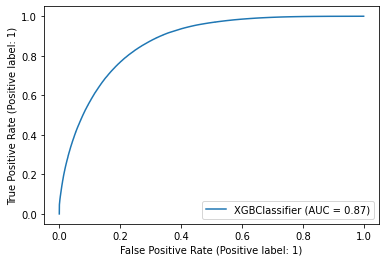

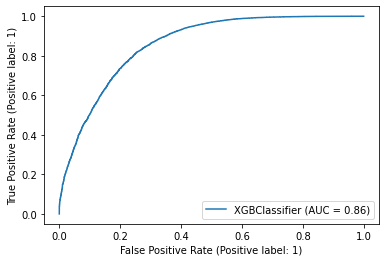

In [23]:
from sklearn.metrics import plot_roc_curve
from xgboost.sklearn import XGBClassifier
xgb_original = XGBClassifier(eval_metric=['logloss','auc','error'])
xgb_original.fit(X_train, y_train)
plot_roc_curve(xgb_original, X_train, y_train)
print("The score of training set is:", xgb_original.score(X_train, y_train))
plot_roc_curve(xgb_original, X_test, y_test)
print("The score of testing set is:", xgb_original.score(X_test, y_test))

### (b).(2) Explain a logistic regression model

### (b).(3) Train a logistic regression model

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [25]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots()

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=16)
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=8)
    ax.grid('on')



In [ ]:
# We use sklearn.model_selection.GridSearchCV to do grid search.
# Since the limitation of computing power, we select 2 parameters every time.
# So we can get a relative accurate result in a short time

In [26]:
import warnings
warnings.filterwarnings("ignore")
param_test1 = {
                'max_depth':range(5,11,1),
                'min_child_weight':range(1,5,1)
                }


xgb1 = XGBClassifier(eval_metric=['logloss','auc','error'])
GS = GridSearchCV(xgb1,param_test1)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)



{'max_depth': 9, 'min_child_weight': 3}
0.8530517788458465


In [27]:
# {'max_depth': 9, 'min_child_weight': 3}
# 0.8530517788458465

print(GS.cv_results_)



{'mean_fit_time': array([35.37717772, 38.11959949, 37.99715495, 38.64491668, 45.01500349,
       45.44197593, 44.43342524, 44.18396783, 51.48702264, 41.49617467,
       33.47429571, 44.96641331, 63.32413015, 65.50593982, 62.64823532,
       64.38577151, 77.2170558 , 79.42031159, 71.26882548, 71.79967966,
       86.545755  , 81.55857544, 48.262637  , 51.21621814]), 'std_fit_time': array([ 4.55587307,  1.21285238,  0.79596814,  1.26138913,  0.97988509,
        1.42859752,  0.76597946,  0.70220727,  0.23904928, 11.60778174,
        0.23715248,  9.32370821,  1.1359444 ,  2.53582303,  0.87306105,
        1.78881635,  3.07363051,  2.35305821,  1.30224056,  1.68408757,
        2.68618158,  1.76540054,  1.61654442,  5.32394963]), 'mean_score_time': array([0.17523851, 0.15063391, 0.15423341, 0.16423635, 0.16643682,
       0.17023797, 0.17723866, 0.16243644, 0.1634295 , 0.15115657,
       0.133534  , 0.15512128, 0.20118332, 0.18895621, 0.17949247,
       0.17867093, 0.2046813 , 0.22074351, 0.204

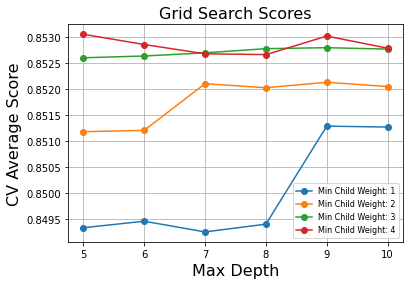

In [33]:
max_depth = range(5,11,1)
min_child_weight = range(1,5,1)
plot_grid_search(GS.cv_results_, max_depth, min_child_weight, 'Max Depth', 'Min Child Weight')

In [ ]:
# The previous result shows that "n_estimators" should greater than 150 and "max_depth" should smaller than 20.

In [34]:
param_test2 = {
                'learning_rate':[0.1,0.5,1],
                'subsample':[0.1,0.5,1]
                }


xgb2 = XGBClassifier(max_depth=9, min_child_weight=3, eval_metric=['logloss','auc','error'])
GS2 = GridSearchCV(xgb2,param_test2)
GS2.fit(X_train,y_train)
print(GS2.best_params_)
print(GS2.best_score_)

{'learning_rate': 0.5, 'subsample': 1}
0.851617084223353


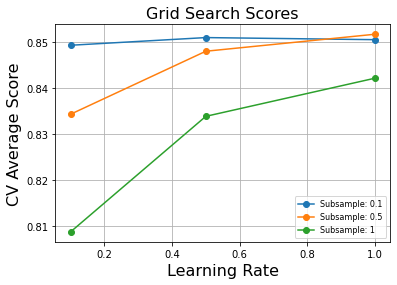

In [35]:
learning_rate = [0.1,0.5,1]
subsample =[0.1,0.5,1]
plot_grid_search(GS2.cv_results_, learning_rate, subsample, 'Learning Rate', 'Subsample')

In [ ]:
# The previous result shows that "n_estimators" should be 200 and "max_depth" should be 20.

In [36]:
param_test3 = {
                'colsample_bytree':[0.3,0.7,1],
                'sampling_method':['uniform','gradient_based']
                }


xgb3 = XGBClassifier(learning_rate=1,subsample=0.5,  max_depth=9, min_child_weight=3, eval_metric=['logloss','auc','error'])
GS3 = GridSearchCV(xgb3,param_test3)
GS3.fit(X_train,y_train)
print(GS3.best_params_)
print(GS3.best_score_)


{'colsample_bytree': 0.3, 'sampling_method': 'uniform'}
0.8391157485402173


In [38]:
print(GS3.cv_results_)

{'mean_fit_time': array([40.97387533,  1.23907886, 66.41727781,  1.24346476, 86.34651012,
        1.2642765 ]), 'std_fit_time': array([1.14225017, 0.02171629, 0.84243898, 0.0320893 , 0.31839855,
       0.04696834]), 'mean_score_time': array([0.35908031, 0.        , 0.34767089, 0.        , 0.33826799,
       0.        ]), 'std_score_time': array([0.01191925, 0.        , 0.01762619, 0.        , 0.02570205,
       0.        ]), 'param_colsample_bytree': masked_array(data=[0.3, 0.3, 0.7, 0.7, 1, 1],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_sampling_method': masked_array(data=['uniform', 'gradient_based', 'uniform',
                   'gradient_based', 'uniform', 'gradient_based'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'colsample_bytree': 0.3, 'sampling_method': 'uniform'}, {'colsample_bytree': 0.3, 'sampling_method': 'gradient_b

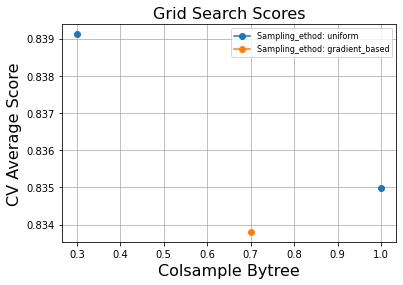

In [40]:
colsample_bytree=[0.3,0.7,1]
sampling_method=['uniform','gradient_based']
plot_grid_search(GS3.cv_results_, colsample_bytree, sampling_method, 'Colsample Bytree', 'Sampling_ethod')

In [41]:
# Since the score keeps increasing as max_leaf_nodes keeps increasing, we assume unlimited max_leaf_nodes will be a good choice.
param_test4 = {
                'colsample_bytree':[0.1,0.2,0.3],
                'reg_alpha':[1e-3, 1e-2, 0.1, 1, 100]
                }


xgb4 = XGBClassifier(sampling_method='uniform', learning_rate=1,subsample=0.5,  max_depth=9, min_child_weight=3, eval_metric=['logloss','auc','error'])
GS4 = GridSearchCV(xgb4,param_test4)
GS4.fit(X_train,y_train)
print(GS4.best_params_)
print(GS4.best_score_)


{'colsample_bytree': 0.3, 'reg_alpha': 100}
0.8460039277744906


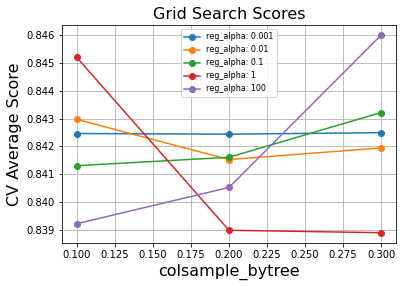

In [44]:
colsample_bytree=[0.1,0.2,0.3]
reg_alpha=[1e-3, 1e-2, 0.1, 1, 100]
plot_grid_search(GS4.cv_results_,  colsample_bytree,reg_alpha,  'colsample_bytree','reg_alpha')

In [56]:
# Since the score keeps increasing as max_leaf_nodes keeps increasing, we assume unlimited max_leaf_nodes will be a good choice.
param_test5 = {
                'n_estimators':[500,1000,1500],
                'reg_alpha':[10,100,1000]
                }


xgb5 = XGBClassifier(colsample_bytree=0.3, sampling_method='uniform', learning_rate=1,subsample=0.5,  max_depth=9, min_child_weight=3, eval_metric=['logloss','auc','error'])
GS5 = GridSearchCV(xgb5,param_test5)
GS5.fit(X_train,y_train)
print(GS5.best_params_)
print(GS5.best_score_)

{'n_estimators': 1500, 'reg_alpha': 100}
0.8504289402193319


In [63]:
print(GS5.cv_results_)
print(GS5.best_params_)
print(GS5.best_score_)

{'mean_fit_time': array([201.11849537, 160.84169993,  65.25903726, 403.03136349,
       340.09998631, 119.61218858, 603.18872671, 507.80965972,
       187.08247337]), 'std_fit_time': array([ 7.16652176,  1.32519902,  2.13004771,  4.5396316 ,  8.96148678,
        0.87309068, 20.39544591, 25.70462233, 12.70806663]), 'mean_score_time': array([0.58492212, 0.48149323, 0.15283332, 1.11684794, 0.91819658,
       0.17323418, 1.65975876, 1.31217613, 0.2090426 ]), 'std_score_time': array([0.01772861, 0.00574549, 0.00397097, 0.04010516, 0.02826865,
       0.00548654, 0.09156287, 0.1142043 , 0.01282856]), 'param_n_estimators': masked_array(data=[500, 500, 500, 1000, 1000, 1000, 1500, 1500, 1500],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_reg_alpha': masked_array(data=[10, 100, 1000, 10, 100, 1000, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False, Fa

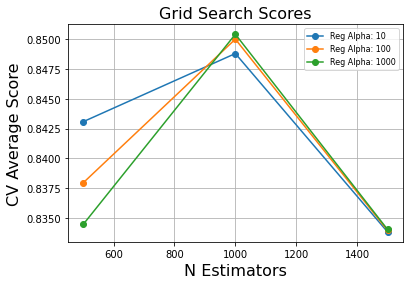

In [61]:
n_estimators = [500,1000,1500]
reg_alpha=[10,100,1000]
plot_grid_search(GS5.cv_results_,  n_estimators, reg_alpha,  'N Estimators','Reg Alpha')

The score of training set is: 0.8579346732429389
The score of testing set is: 0.8797317267250199


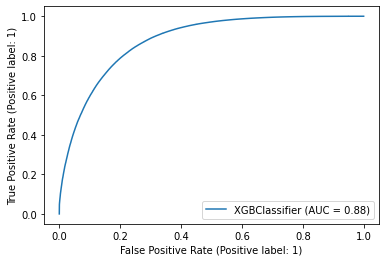

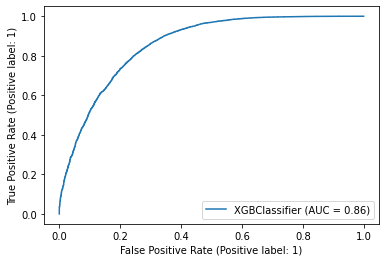

In [62]:
xgb_new = XGBClassifier(n_estimators=1000, colsample_bytree=0.5, reg_alpha=100, sampling_method='uniform', learning_rate=1,subsample=0.5,  max_depth=15, min_child_weight=3, eval_metric=['logloss','auc','error'])
xgb_new.fit(X_train, y_train)
plot_roc_curve(xgb_new, X_train, y_train)
print("The score of training set is:", xgb_new.score(X_train, y_train))
plot_roc_curve(xgb_new, X_test, y_test)
print("The score of testing set is:", xgb_new.score(X_test, y_test))